In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dic = {}
with open('../resource/snippet_camel_3.txt') as f:
    while True:
        line = f.readline()
        if line == '':
            break
        tmp = line.split('\t')
        dic[tmp[0]] = len(tmp[1:])

In [3]:
id_list = []
id2_list = []
for key in dic.keys():
    tmp = key.split('-')
    id_list.append(int(tmp[0]))
    id2_list.append(int(tmp[1]))

In [4]:
length_df = pd.DataFrame(
    data= {'id':id_list,
           'id2':id2_list,
           'snippet_length':dic.values()
           }
)

In [5]:
length_df.head(5)

,id,id2,snippet_length
0,1,1,37
1,2,1,28
2,3,1,88
3,4,1,31
4,5,1,114


In [6]:
hexsha_df = pd.read_csv('../../../../sample_data/data/camel_on_spiral/hexsha_filename_camel.txt',
                        header=None,
                        names=["id","commit_hash", "before_filename", "after_filename","change_type"]
                        )

In [7]:
hexsha_df.head(5)

,id,commit_hash,before_filename,after_filename,change_type
0,1,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
1,2,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
2,3,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
3,4,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
4,5,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A


In [8]:
df = pd.merge(length_df, hexsha_df, on='id', how='left')

In [9]:
df

,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type
0,1,1,37,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
1,2,1,28,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
2,3,1,88,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
3,4,1,31,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
4,5,1,114,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
...,...,...,...,...,...,...,...
469851,215351,3,30,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
469852,215352,1,11,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
469853,215352,2,11,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
469854,215353,1,11,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M


In [10]:
print('{}'.format(df['snippet_length'].mean()))

47.45378158414493


In [11]:
df2 = df[['id','change_type','snippet_length']].groupby(['id','change_type'], as_index=False).sum()

In [12]:
df2

,id,change_type,snippet_length
0,1,A,37
1,2,A,28
2,3,A,88
3,4,A,31
4,5,A,114
...,...,...,...
158835,215349,M,56
158836,215350,M,24
158837,215351,M,54
158838,215352,M,22


In [13]:
df3 = df2[['change_type', 'snippet_length']].groupby(['change_type'], as_index=False).agg(['count','mean','std','median','max','min'])

In [14]:
df3

snippet_length                                          
                     count        mean         std median    max min
change_type                                                         
A                    26487  467.820591  791.192576  301.0  49908  12
M                   128183   75.679653  203.463684   30.0  33475   1
R                     4170   49.025180  103.652079   19.0   2168   6

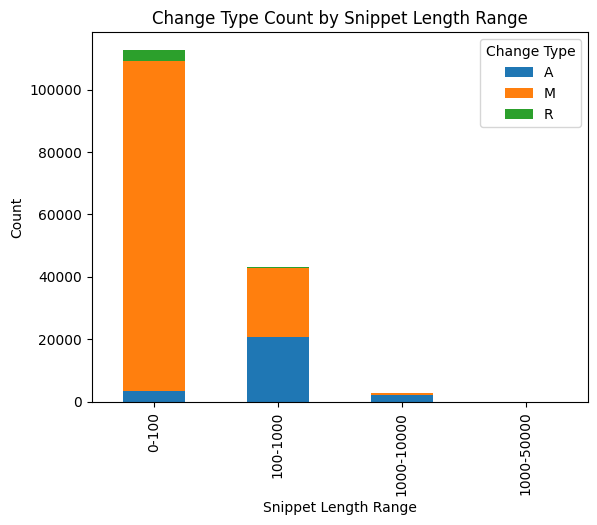

In [15]:
bins = [0, 100, 1000, 10000, 50000]
labels = ['0-100', '100-1000', '1000-10000', '1000-50000']  # 各範囲のラベル

df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)

# 範囲ごとのchange_typeの数を計算
change_type_counts = df2.groupby(['snippet_length_range', 'change_type']).size().unstack()

change_type_counts.plot(kind='bar', stacked=True)

plt.xlabel('Snippet Length Range')
plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()

In [16]:
target_ratio = 0.9

sorted_df = df2.sort_values('snippet_length')

cumulative_sum = sorted_df['snippet_length'].cumsum()
cumulative_ratio = cumulative_sum / cumulative_sum.max()

threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]

print(threshold_value)

2475


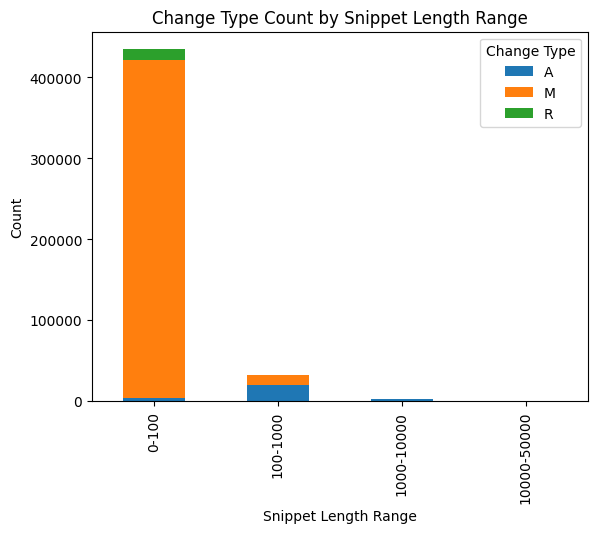

In [28]:
bins = [0, 100, 1000, 10000, 50000]
labels = ['0-100', '100-1000', '1000-10000', '10000-50000']  # 各範囲のラベル
df['snippet_length_range'] = pd.cut(df['snippet_length'], bins=bins, labels=labels)

# 範囲ごとのchange_typeの数を計算
change_type_counts = df.groupby(['snippet_length_range', 'change_type']).size().unstack()

change_type_counts.plot(kind='bar', stacked=True)

plt.xlabel('Snippet Length Range')
plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()

In [29]:
target_ratio = 0.9

sorted_df = df.sort_values('snippet_length')

cumulative_sum = sorted_df['snippet_length'].cumsum()
cumulative_ratio = cumulative_sum / cumulative_sum.max()

threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]

print(threshold_value)

2248


In [30]:
sorted_df

,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type,snippet_length_range
22833,10510,1,1,c36b6824f9449af2c4d306297204fc4381dd506c,camel-core/src/main/java/org/apache/camel/proc...,camel-core/src/main/java/org/apache/camel/proc...,M,0-100
22843,10514,1,1,c36b6824f9449af2c4d306297204fc4381dd506c,components/camel-spring/src/test/java/org/apac...,components/camel-spring/src/test/java/org/apac...,M,0-100
21686,9915,1,1,063797bb691be182cb1e8c12cf336ffb68433fdd,components/camel-spring/src/test/java/org/apac...,components/camel-spring/src/test/java/org/apac...,M,0-100
41041,17794,1,1,162699814a810c64b7acc008dfe9d1cb877f4087,components/camel-jaxb/src/test/java/org/apache...,components/camel-jaxb/src/test/java/org/apache...,M,0-100
116293,51330,1,1,f63b7f93c62c4b8510de13cd1997d2a07ab4d767,components/camel-twitter/src/main/java/org/apa...,components/camel-twitter/src/main/java/org/apa...,M,0-100
...,...,...,...,...,...,...,...,...
309143,125862,1,23081,40685296333d69402111067c1a1a9b3f99a6661f,components/camel-hl7/src/main/java/org/apache/...,components/camel-hl7/src/main/java/org/apache/...,A,10000-50000
368951,155193,1,28877,d1099089c4af691f649080693786101d9b4c13dd,camel-core/src/main/java/org/apache/camel/impl...,camel-core/src/main/java/org/apache/camel/impl...,A,10000-50000
253807,106993,6,31800,e1cfeb5a55200350771c88c93e65720990131610,components/camel-salesforce/camel-salesforce-c...,components/camel-salesforce/camel-salesforce-c...,M,10000-50000
260342,109979,1,32689,c8d2aad1685568ac8cdc59e9e956914435fa9535,connectors/examples/salesforce-upsert-contact-...,connectors/examples/salesforce-upsert-contact-...,A,10000-50000


In [27]:
sorted_df[sorted_df['snippet_length'] == 49908]

,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type,snippet_length_range
292729,119760,1,49908,2a0a9e6656bac7a82e6594a5a12f889834d6f2b6,components/camel-thrift/src/test/java/org/apac...,components/camel-thrift/src/test/java/org/apac...,A,1000-50000


In [20]:
sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length']


384021     2248
384020     2251
296706     2253
301169     2253
171519     2257
          ...  
309143    23081
368951    28877
253807    31800
260342    32689
292729    49908
Name: snippet_length, Length: 562, dtype: int64

In [21]:
word_cnt_df = pd.read_table('../resource/mapping_camel_3.txt',
                            header=None,
                            names=["id","word", "cnt"]
)

In [22]:
target_ratio = 0.9

sorted_df = word_cnt_df

cumulative_sum = sorted_df['cnt'].cumsum()
cumulative_ratio = cumulative_sum / cumulative_sum.max()

threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'cnt'].iloc[0]

print(threshold_value)

3193


KeyError: 'snippet_length'